In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from sklearn import preprocessing
import datetime

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)

In [2]:
# load data
data = pd.read_csv('/Users/lining_zhang/Desktop/MSDS/1001--intro_to_DS/1001--project/data_v2.csv')
data.typeid = data.typeid.map({'美食圈':'food', '美食测评':'food_eval', '美食侦探':'food_detect', '日常':'daily', 
                               '田园美食':'food_country', '搞笑':'funny', '美食记录':'food_record'})
data

# data.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)
# data.to_csv('data_v2.csv', index=False)

,aid,author,bvid,created,description,comment,follower,length,likes,play,title,typeid,video_review,top1,top1_count,top2,top2_count,top3,top3_count,count_sum,food_ratio,life_ratio
0,797419793.0,拜托了小翔哥,BV1qy4y1C7fS,2020-10-15 17:53:29,记得戴上耳机，深夜躲在被窝里二刷，所有的不开心都会被治愈！,2188,2840710,396,4995407,1040090,小伙网上学来的饺子馅秘方，晚上肚子饿，起来在床边偷吃了一大碗,food,7498,生活,17.0,美食,14.0,none,0.0,31.0,0.451613,0.548387
1,627391341.0,拜托了小翔哥,BV1rt4y1v7ZK,2020-10-13 17:49:18,小伙一天做了三盆口味鸡爪，最好吃的原来是这一款,1589,2840710,422,4995407,995238,小伙一天做了三盆口味的鸡爪，只为找到最好吃的那一款,food,3797,生活,17.0,美食,14.0,none,0.0,31.0,0.451613,0.548387
2,372483730.0,拜托了小翔哥,BV18Z4y1L74x,2020-10-12 19:06:54,网传蒙上眼睛堵住鼻子会分不出可乐和雪碧，小伙不信试了一下，结果却大吃一惊。,1842,2840710,326,4995407,1015514,听说蒙上眼睛堵住鼻子会分不出可乐和雪碧，试一试,funny,2905,生活,17.0,美食,14.0,none,0.0,31.0,0.451613,0.548387
3,287261155.0,拜托了小翔哥,BV1Rf4y1D7az,2020-10-08 18:29:21,风靡世界的欧洲版沙县小吃，小伙在家大口吃滋滋冒油的土耳其烤肉,2096,2840710,406,4995407,1514605,398买的烤炉自制mini版土耳其烤肉，大肉片滋滋冒油太香啦,food,6673,生活,17.0,美食,14.0,none,0.0,31.0,0.451613,0.548387
4,202373061.0,拜托了小翔哥,BV18h41197fY,2020-10-05 17:59:08,爷青回，印度小吃应该是第四集了吧，大家还喜欢看的话，我又继续给大家拍。,2835,2840710,397,4995407,1371182,跟印度小哥学做咖喱，原来是这样做的，以后再也不用去超市买了,food_detect,9157,生活,17.0,美食,14.0,none,0.0,31.0,0.451613,0.548387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22084,11191048.0,司徒建国Stu,BV11x411a75L,2017-06-09 17:27:34,想知道为什么牛津学霸【司徒】还是比不了中国的高考学生吗？,96,332213,39,1125470,28868,【司徒】为什么比不了中国的高考学生,funny,59,生活,40.0,美食,24.0,音乐,17.0,81.0,0.296296,0.493827
22085,10771892.0,司徒建国Stu,BV1Lx411Y7vL,2017-05-23 17:55:25,司徒带你看他在英国“妈爸”的房子，司徒的父母也会讲中文？！,289,332213,238,1125470,57394,【司徒】好便宜！快去英国买房子,daily,589,生活,40.0,美食,24.0,音乐,17.0,81.0,0.296296,0.493827
22086,9626501.0,司徒建国Stu,BV1ix411Q7iq,2017-04-05 14:36:52,为了教你们时下最流行最地道的英语表达，司徒老湿不惜示范洗澡和便便！温馨提示，吃饭勿看。,45,332213,169,1125470,7576,【司徒】老外大尺度湿身教学地道英语,daily,92,生活,40.0,美食,24.0,音乐,17.0,81.0,0.296296,0.493827
22087,8866058.0,司徒建国Stu,BV1Fx41117Ye,2017-02-27 13:20:55,英语好难学，崩溃了，真不想学……大家学英语的苦，司徒宝宝都知道，因为跟他学中文时的感觉是一样...,41,332213,256,1125470,5393,【司徒】英语学不好？老外教你...找借口！,daily,139,生活,40.0,美食,24.0,音乐,17.0,81.0,0.296296,0.493827


In [3]:
# number of records & features
data.shape

(22089, 22)

In [4]:
# check data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22089 entries, 0 to 22088
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   aid           22089 non-null  float64
 1   author        22089 non-null  object 
 2   bvid          22089 non-null  object 
 3   created       22089 non-null  object 
 4   description   20832 non-null  object 
 5   comment       22089 non-null  int64  
 6   follower      22089 non-null  int64  
 7   length        22089 non-null  int64  
 8   likes         22089 non-null  int64  
 9   play          22089 non-null  int64  
 10  title         22089 non-null  object 
 11  typeid        22089 non-null  object 
 12  video_review  22089 non-null  int64  
 13  top1          22089 non-null  object 
 14  top1_count    22089 non-null  float64
 15  top2          22089 non-null  object 
 16  top2_count    22089 non-null  float64
 17  top3          22089 non-null  object 
 18  top3_count    22089 non-nu

In [5]:
# descriptive analysis for numeric variables
data[['length', 'comment', 'video_review', 'follower', 'likes', 'play']].describe().T

,count,mean,std,min,25%,50%,75%,max
length,22089.0,3.693168e+02,3.534775e+02,4.0,177.0,300.0,458.0,15530.0
comment,22089.0,6.918707e+02,1.583044e+03,0.0,81.0,260.0,695.0,57738.0
video_review,22089.0,2.296057e+03,6.306782e+03,0.0,58.0,522.0,1883.0,149894.0
follower,22089.0,7.061875e+05,1.226638e+06,58.0,74742.0,293878.0,743162.0,9091630.0
likes,22089.0,3.744781e+06,7.408881e+06,2531.0,288748.0,1420608.0,3811101.0,68404753.0
play,22089.0,3.279761e+05,6.979180e+05,0.0,22784.0,99061.0,302932.0,14479034.0


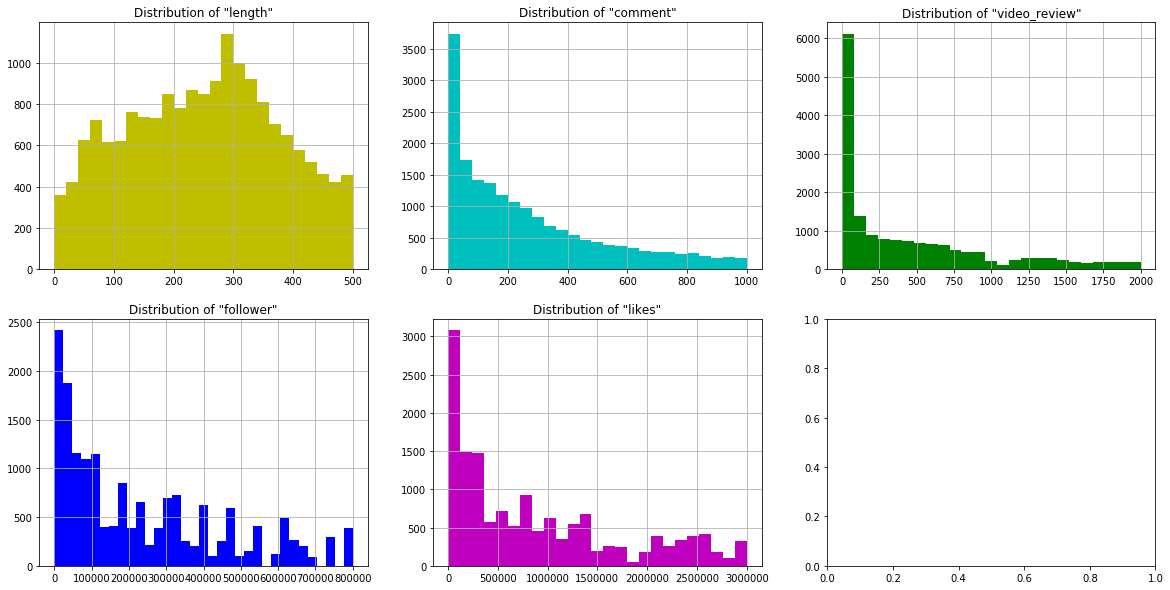

In [6]:
# Distribution of 'length', 'comment', 'video_review', 'follower', 'likes'
fig, ax = plt.subplots(2, 3, figsize=(20,10))

data['length'].hist(bins=25, range=(0,500), color='y', ax=ax[0,0])
data['comment'].hist(bins=25, range=(0,1000), color='c', ax=ax[0,1])
data['video_review'].hist(bins=25, range=(0,2000), color='g', ax=ax[0,2])
data['follower'].hist(bins='auto', range=(100, 800000), color='b', ax=ax[1,0])
data['likes'].hist(bins=25, range=(2000, 3000000), color='m', ax=ax[1,1])

ax[0,0].set_title('Distribution of "length"')
ax[0,1].set_title('Distribution of "comment"')
ax[0,2].set_title('Distribution of "video_review"')
ax[1,0].set_title('Distribution of "follower"')
ax[1,1].set_title('Distribution of "likes"');

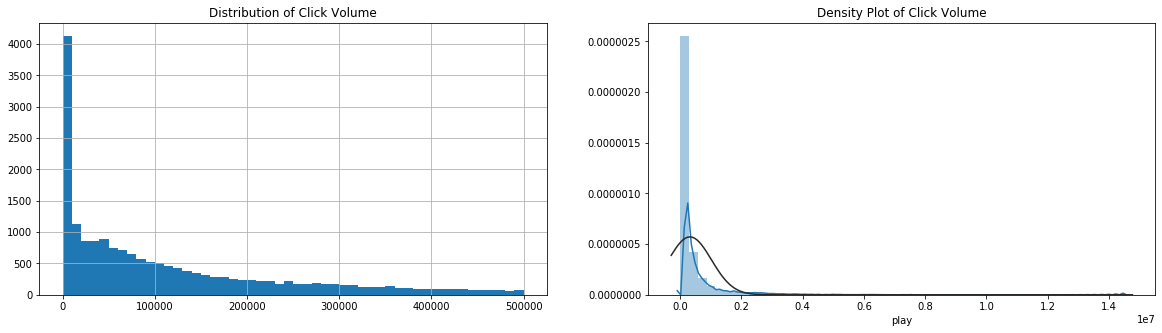

In [7]:
# visualization for target variable (Y)
fig, ax = plt.subplots(1, 2, figsize=(20,5))

data['play'].hist(bins=50, range=(0,500000), ax=ax[0])
sns.distplot(data['play'], fit=norm, ax=ax[1])

ax[0].set_title('Distribution of Click Volume')
ax[1].set_title('Density Plot of Click Volume');

food            8976
food_eval       4141
food_detect     3732
daily           2649
food_country    1325
funny            657
food_record      609
Name: typeid, dtype: int64


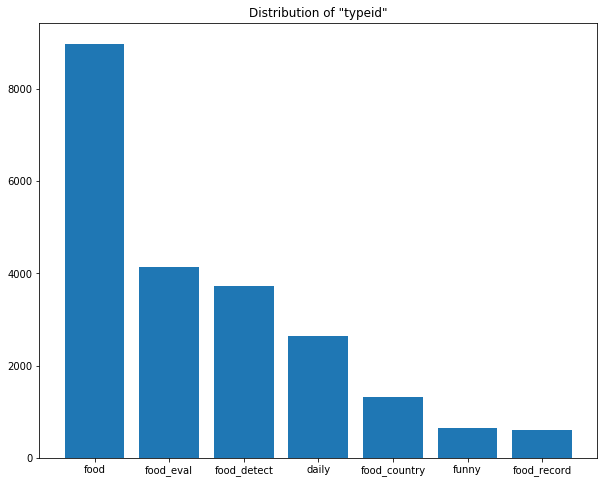

In [8]:
# Distribution of 'typeid'
print(data.typeid.value_counts())

type_list = list(data.typeid.value_counts().keys())
type_count = list(data.typeid.value_counts().values)
plt.figure(figsize=(10,8))
plt.bar(type_list, type_count)
plt.title('Distribution of "typeid"');

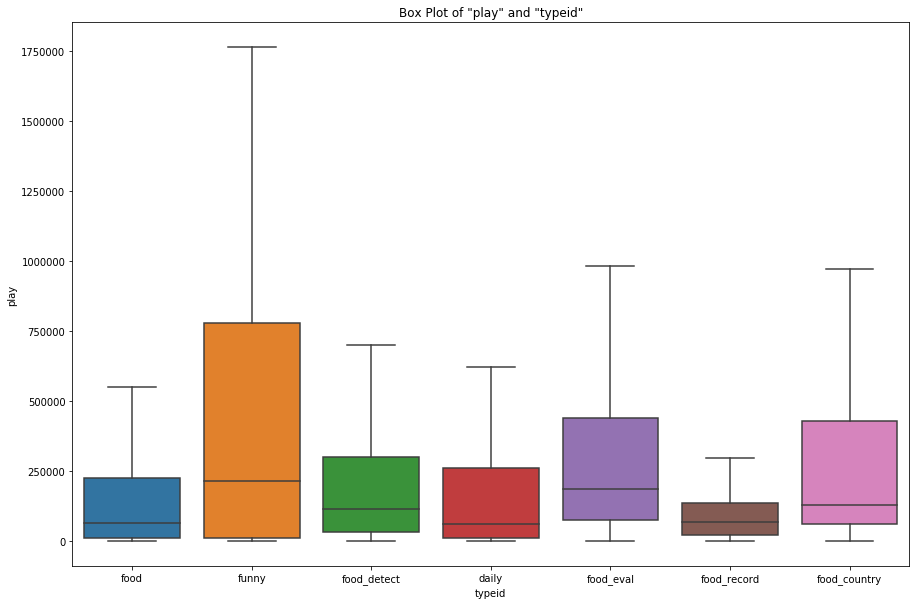

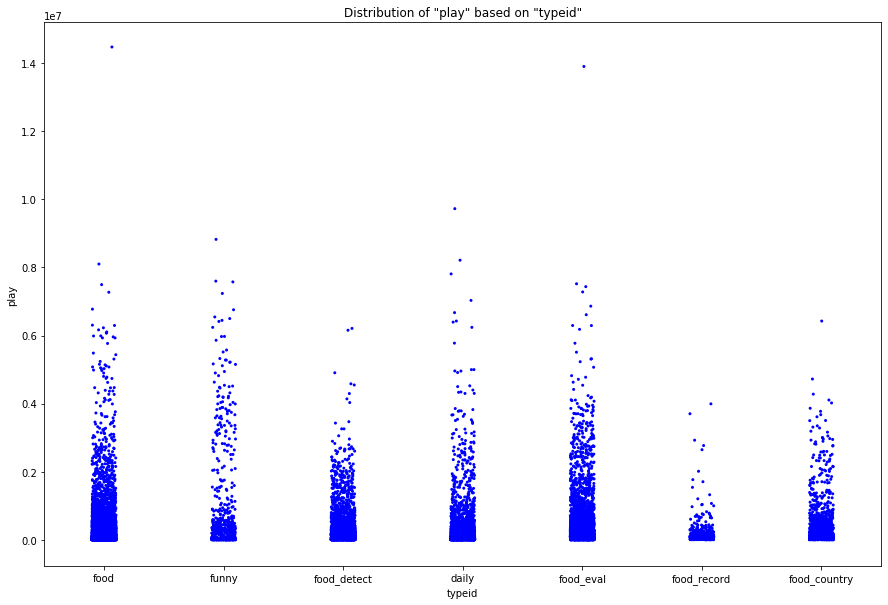

In [9]:
# Distribution of Click Volume Based on Typeid

plt.figure(figsize=(15,10))
sns.boxplot(x='typeid',y='play',data = data, showfliers=False)
plt.title('Box Plot of "play" and "typeid"');

plt.figure(figsize=(15,10))
sns.stripplot(x='typeid', y='play', data=data, jitter=True, color='b', size=3)
plt.title('Distribution of "play" based on "typeid"');

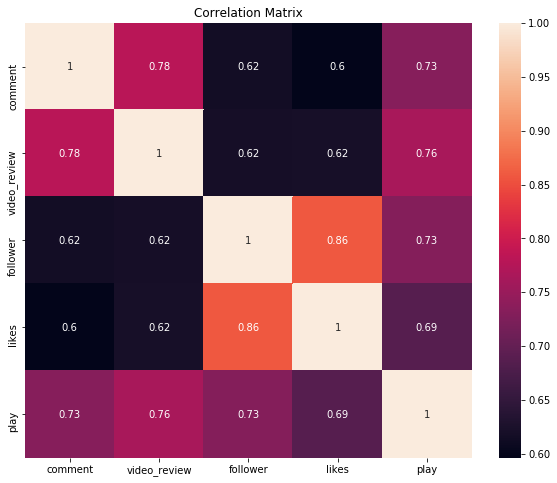

In [10]:
# correlation between 'comment', 'video_review', 'follower', 'likes', 'play'
corr_df = data[['comment', 'video_review', 'follower', 'likes', 'play']]
corrmat = corr_df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corrmat, annot=True)
plt.title('Correlation Matrix');

In [11]:
# create feature 'hour' & 'day_time'
# '1' if the video is created during daytime, '0' otherwise

day_time = [str(i) for i in range(6,19)]
night_time = [str(i) for i in range(19,24)] + ['00'] + [str(i) for i in range(1,6)]

data['hour'] = data['created'].apply(lambda x : x.split(' ')[1][0:2])
data.loc[data.hour.isin(day_time), 'day_time'] = 1
data.loc[data.hour.isin(night_time), 'day_time'] = 0

In [12]:
# create feature 'weekday' & 'is_weekend'
from datetime import datetime
data.created = data.created.map(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
data['weekday'] = data.created.map(lambda x: x.weekday())

mon_fri = [0, 1, 2, 3, 4]
sat_sun = [5, 6]
data.loc[data.weekday.isin(sat_sun), 'is_weekend'] = 1
data.loc[data.weekday.isin(mon_fri), 'is_weekend'] = 0

# check 'is_weekend' distribution
data.is_weekend.value_counts()

0.0    16176
1.0     5913
Name: is_weekend, dtype: int64

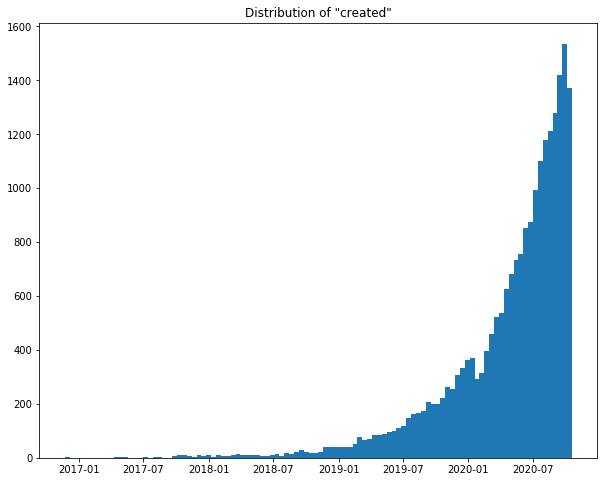

In [13]:
# Distribution of the time when videos created
plt.figure(figsize=(10,8))
plt.hist(data.created, bins="auto")
plt.title('Distribution of "created"');

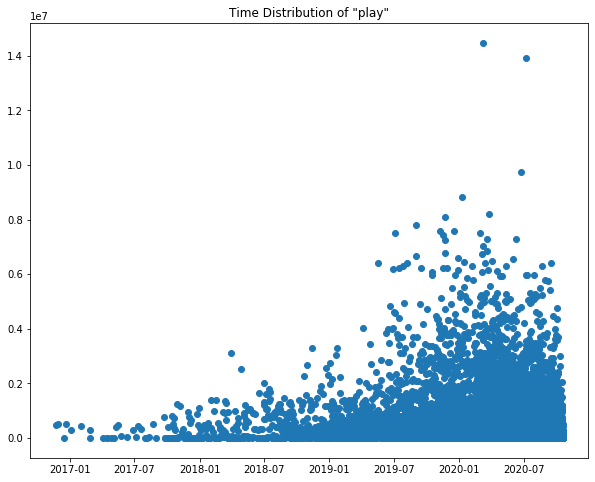

In [14]:
# Distribution of 'play' based on 'created'
import matplotlib.dates as md

plt.figure(figsize=(10,8))
dates = md.date2num(data.created)
plt.plot_date(dates, data.play)
plt.title('Time Distribution of "play"');

In [15]:
# create 'last_3month_play'
from datetime import datetime, timedelta

for i in range(len(data)):
    author_con = data.loc[i]['author']
    stop_time = data.loc[i]['created']
    start_time = stop_time - timedelta(days=90)
    data.loc[i,'last_3month_play'] = data.loc[(data.author==author_con) & 
                                              (data.created>start_time) & (data.created<stop_time)]['play'].mean()

# fill missing values in 'last_3month_play' with 0
data.fillna(0, inplace=True)

In [16]:
# create 'last_3month_count'
for i in range(len(data)):
    author_con = data.loc[i]['author']
    stop_time = data.loc[i]['created']
    start_time = stop_time - timedelta(days=90)
    data.loc[i,'last_3month_count'] = data.loc[(data.author==author_con) & 
                                              (data.created>start_time) & (data.created<stop_time)]['play'].count()

In [17]:
# create dummy variables for 'typeid'
# from sklearn import preprocessing

enc = preprocessing.OneHotEncoder()
enc.fit(np.array(data.typeid).reshape(-1, 1))
tyid_df = pd.DataFrame(enc.transform(np.array(data.typeid).reshape(-1, 1)).toarray())
tyid_df.rename(columns={0:'daily', 1:'food', 2:'food_country', 3:'food_detect', 
                        4:'food_eval', 5:'food_record', 6:'funny'}, inplace=True)
tyid_df

,daily,food,food_country,food_detect,food_eval,food_record,funny
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
22084,0.0,0.0,0.0,0.0,0.0,0.0,1.0
22085,1.0,0.0,0.0,0.0,0.0,0.0,0.0
22086,1.0,0.0,0.0,0.0,0.0,0.0,0.0
22087,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# concatenate tyid_df & tag_df to whole dataset
data = pd.concat([tyid_df, data], axis=1)

tag_df = pd.read_csv('/Users/lining_zhang/Desktop/MSDS/1001--intro_to_DS/1001--project/data_all_withtag.csv')
tag_df = tag_df.loc[tag_df.typeid.isin(['美食圈', '美食测评', '美食侦探', '日常', '田园美食', '搞笑', '美食记录']), 
                                       list(tag_df.columns.values)[-20:]]
data = pd.concat([tag_df, data], axis=1)

# drop records with NaN
data.dropna(inplace=True)

In [31]:
# create log('play')
data['log_play'] = np.log(data.play)

# filter on time (2019-09-15 to 2020-09-15)
start_date = datetime.strptime('2019-09-15 0:00:00', '%Y-%m-%d %H:%M:%S')
stop_date = datetime.strptime('2020-09-15 23:59:59', '%Y-%m-%d %H:%M:%S')
filtered_data = data.loc[(data.created>start_date) & (data.created<stop_date)]
filtered_data.to_csv('data_v3.csv', index=0)

filtered_data

,美食,美食制作,生活,美食圈,日常,吃货,美食侦探,美食vlog,吃播,美食测评,搞笑,料理制作,厨艺,VLOG,制作教程,家常菜,美食视频,自制,生活记录,全能打卡挑战,daily,food,food_country,food_detect,food_eval,food_record,funny,aid,author,bvid,created,description,comment,follower,length,likes,play,title,typeid,video_review,top1,top1_count,top2,top2_count,top3,top3_count,count_sum,food_ratio,life_ratio,hour,day_time,weekday,is_weekend,last_3month_play,last_3month_count,log_play
11,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,969573010.0,拜托了小翔哥,BV1ip4y1e7wc,2020-09-13 12:00:16,黄金蟹季，小帅翔化身“顶级大厨”自制国宴同款蟹酿橙，味道竟出乎意料,2383.0,2840710.0,384.0,4995407.0,1732729.0,国宴蟹酿橙，近千年流传下来的最高级吃法，一口满嘴蟹肉超满足,food,7039.0,生活,17.0,美食,14.0,none,0.0,31.0,0.451613,0.548387,12,1.0,6.0,1.0,3.613441e+06,11.0,14.365208
12,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,841940174.0,拜托了小翔哥,BV1w54y1v7uX,2020-09-03 17:30:31,小帅翔收到了邀请，来到了一直好奇和向往的大西北，亲身体验之后感觉真是美到让人窒息。,4333.0,2840710.0,385.0,4995407.0,1627073.0,帅大叔30岁挑战自驾穿越西北，每一帧都是屏保级的美【上集】,daily,32623.0,生活,17.0,美食,14.0,none,0.0,31.0,0.451613,0.548387,17,1.0,3.0,0.0,3.812078e+06,10.0,14.302293
13,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,969303568.0,拜托了小翔哥,BV1Cp4y1v7hT,2020-08-24 12:00:55,什么，战斧牛排竟还只是一道开胃菜？后面的惊喜真的让我湿红了眼。,8082.0,2840710.0,618.0,4995407.0,2779978.0,马上七夕了，小翔嫂竟带我去吃了最正经的战斧牛排,food,37169.0,生活,17.0,美食,14.0,none,0.0,31.0,0.451613,0.548387,12,1.0,0.0,0.0,3.926756e+06,9.0,14.837954
14,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,371865629.0,拜托了小翔哥,BV1oZ4y1K7tb,2020-08-21 19:21:52,好山好水好贵州，山珍海味不如这一口小豆腐,6380.0,2840710.0,309.0,4995407.0,3053684.0,贵 州 豆 腐 宴,food_detect,10679.0,生活,17.0,美食,14.0,none,0.0,31.0,0.451613,0.548387,19,0.0,4.0,0.0,4.035890e+06,8.0,14.931859
15,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,796675076.0,拜托了小翔哥,BV12C4y147Ka,2020-08-15 19:08:54,高校农业产品，让我们吃得健康吃得安心，我们要珍惜粮食，不要浪费哦,7660.0,2840710.0,823.0,4995407.0,2802872.0,开箱10款知名大学的美食，带着文凭吃起来那都是知识的力量,food_eval,26588.0,生活,17.0,美食,14.0,none,0.0,31.0,0.451613,0.548387,19,0.0,5.0,1.0,4.212035e+06,7.0,14.846155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22052,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,79926167.0,司徒建国Stu,BV13J411b7N5,2019-12-20 12:17:15,终于有博步不爱吃的东西了！（还是吃掉了）,2524.0,332213.0,1243.0,1125470.0,2528062.0,英国爸妈第一次吃重庆火锅 博步韩梅梅的中国VLOG6,food_detect,20487.0,生活,40.0,美食,24.0,音乐,17.0,81.0,0.296296,0.493827,12,1.0,4.0,0.0,5.686762e+05,4.0,14.742964
22053,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,77752466.0,司徒建国Stu,BV1nJ411z726,2019-12-02 12:30:29,上海的亲们对不起，我爸妈还是爱你们！,1228.0,332213.0,1153.0,1125470.0,584008.0,英国爸妈第一次到重庆看长江 过江索道坐不腻！博步韩梅梅的中国VLOG5,food_detect,8422.0,生活,40.0,美食,24.0,音乐,17.0,81.0,0.296296,0.493827,12,1.0,0.0,0.0,5.635657e+05,3.0,13.277670
22054,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,76028890.0,司徒建国Stu,BV1UJ411275c,2019-11-17 19:28:05,是什么好吃的让博步吃个不停？,1186.0,332213.0,677.0,1125470.0,713864.0,英国爸妈看到乐山大佛惊叹了！博步韩梅梅的中国VLOG4,food_detect,5404.0,生活,40.0,美食,24.0,音乐,17.0,81.0,0.296296,0.493827,19,0.0,6.0,1.0,4.884165e+05,2.0,13.478448
22055,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,72029006.0,司徒建国Stu,BV1JE411r7QR,2019-10-21 23:29:11,博步韩梅梅刚到成都大吃川菜还说不辣（av70949630），第二天韩梅梅就病倒了。。。不过还...,581.0,332213.0,440.0,1125470.0,300846.0,博步韩梅梅的中国VLOG2 发现博步的双胞胎兄弟！,food_detect,2567.0,生活,40.0,美食,24.0,音乐,17.0,81.0,0.296296,0.493827,23,0.0,0.0,0.0,4.010425e+05,2.0,12.614354


In [19]:
# create binning for numeric features

# def bin_feature(feature, n_bins):
#     est = preprocessing.KBinsDiscretizer(n_bins=n_bins, encode='ordinal')
#     bins = est.fit_transform(feature)
#     return bins

# numeric features: 'comment', 'length', 'video_review', 
#                   'follower', 'likes'